In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/all_stocks_5yr.csv')

##### Date - specifies trading date
Open - opening price ...

High - maximum price during the day...

Low - minimum price during the day
Close - close price adjusted for splits...

Adj Close - adjusted close price adjusted for both dividends and splits....

Volume - the number of shares that changed hands during a given day...  (عدد الأسهم التي تم تداولها خلال يوم معين.)

In [ ]:
df.head() # to first 5 or select number
# df.tail() to last 5 or select number

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 619040 entries, 0 to 619039
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    619040 non-null  object 
 1   open    619029 non-null  float64
 2   high    619032 non-null  float64
 3   low     619032 non-null  float64
 4   close   619040 non-null  float64
 5   volume  619040 non-null  int64  
 6   Name    619040 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 33.1+ MB


In [ ]:
df.shape

(619040, 7)

In [ ]:
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Number of rows: 619040
Number of columns: 7


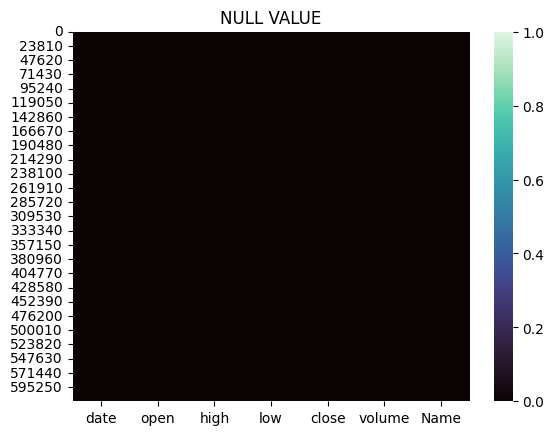

In [ ]:
plt.title('NULL VALUE')
sns.heatmap(df.isnull(),cmap='mako')
plt.show()

In [ ]:
df.isnull().sum()
# This null value cant be seen in heatmap bcz it small number

,0
date,0
open,11
high,8
low,8
close,0
volume,0
Name,0


#### I can just remove it because it not the big based of number of row i have or i can just filling it

In [ ]:
df_cleaned = df.dropna(subset=['open', 'high', 'low'])

In [ ]:
df_cleaned.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [ ]:
df_cleaned.shape

(619029, 7)

In [ ]:
print(f'any duplicated value: {df_cleaned.duplicated().any()}')

any duplicated value: False


In [ ]:
df_cleaned.to_json('df_cleaned.json', orient='records')

In [ ]:
df_cleaned.describe()

,open,high,low,close,volume
count,619029.000000,619029.000000,619029.000000,619029.000000,6.190290e+05
mean,83.023334,83.778419,82.256200,83.043305,4.321892e+06
std,97.378769,98.207735,96.507634,97.388913,8.693671e+06
min,1.620000,1.690000,1.500000,1.590000,1.010000e+02
25%,40.220000,40.620000,39.830000,40.240800,1.070351e+06
50%,62.590000,63.150000,62.020000,62.620000,2.082165e+06
75%,94.370000,95.180000,93.540000,94.410000,4.284550e+06
max,2044.000000,2067.990000,2035.110000,2049.000000,6.182376e+08


In [ ]:
df_cleaned.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'Name'], dtype='object')

In [ ]:
df_filtered = df_cleaned[(df_cleaned['date'] >= '2014-01-01') & (df_cleaned['date'] <= '2015-12-31')]
df_filtered

,date,open,high,low,close,volume,Name
226,2014-01-02,25.07,25.8200,25.060,25.360,8998943,AAL
227,2014-01-03,25.75,26.7500,25.510,26.540,13836062,AAL
228,2014-01-06,26.62,27.2000,26.600,27.030,11272273,AAL
229,2014-01-07,27.20,27.3997,26.670,26.905,11288775,AAL
230,2014-01-08,26.37,27.6800,26.350,27.630,15736891,AAL
...,...,...,...,...,...,...,...
618506,2015-12-24,47.86,48.4500,47.630,48.130,965268,ZTS
618507,2015-12-28,47.96,48.2000,47.590,47.900,928748,ZTS
618508,2015-12-29,48.37,48.6200,47.960,48.330,1483846,ZTS
618509,2015-12-30,48.33,48.6450,48.005,48.260,1453861,ZTS


In [ ]:
bullish_days = df_cleaned[df_cleaned['close'] > df_cleaned['open']]
bullish_days

,date,open,high,low,close,volume,Name,daily_return
3,2013-02-13,14.30,14.94,14.250,14.66,10259500,AAL,0.027330
5,2013-02-15,13.93,14.61,13.930,14.50,15628000,AAL,0.036455
11,2013-02-26,13.14,13.42,12.700,13.26,9419000,AAL,0.018433
12,2013-02-27,13.28,13.62,13.180,13.41,7390500,AAL,0.011312
14,2013-03-01,13.37,13.95,13.320,13.61,7376800,AAL,0.013403
...,...,...,...,...,...,...,...,...
619030,2018-01-25,78.47,79.38,78.345,79.25,2327262,ZTS,0.011745
619031,2018-01-26,79.49,80.13,79.380,80.09,2532808,ZTS,0.010599
619035,2018-02-01,76.84,78.27,76.690,77.82,2982259,ZTS,0.014206
619038,2018-02-06,72.74,74.56,72.130,73.27,4924323,ZTS,-0.007585


Daily Return=
Previous Day’s Close Price /
Current Day’s Close Price−Previous Day’s Close Price
​


In [ ]:
df_cleaned['daily_return'] = df_cleaned['close'].pct_change()

<ipython-input-23-dcdb1a881231>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['daily_return'] = df_cleaned['close'].pct_change()


In [ ]:
high_volatility_days = df_cleaned[abs(df_cleaned['daily_return']) > 0.05] # أيام التقلبات العالية
high_volatility_days

,date,open,high,low,close,volume,Name,daily_return
7,2013-02-20,14.17,14.2600,13.15,13.33,14725200,AAL,-0.065217
35,2013-04-02,16.48,16.5000,15.71,15.74,14595600,AAL,-0.055789
45,2013-04-16,15.96,16.7400,15.81,16.37,10458200,AAL,0.050032
50,2013-04-23,15.33,16.4900,15.33,16.30,12302300,AAL,0.050258
128,2013-08-13,18.86,18.9500,16.29,16.36,78591200,AAL,-0.130712
...,...,...,...,...,...,...,...,...
618380,2015-06-26,53.93,54.0000,48.26,48.62,20823304,ZTS,-0.122066
618444,2015-09-28,42.27,42.3000,39.38,39.96,8954944,ZTS,-0.059986
618470,2015-11-03,46.47,46.9000,45.40,46.63,8007228,ZTS,0.054024
618722,2016-11-02,50.91,50.9800,48.83,50.11,8106716,ZTS,0.060529


In [ ]:
df_cleaned.head()
# First value is null because no day before first day(not problem)

,date,open,high,low,close,volume,Name,daily_return
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,-0.019661
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,-0.013140
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,0.027330
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,-0.045703


In [ ]:
def sort_day_by_volume(df):
    df = df.sort_values(by='volume', ascending=False)
    return df
print(sort_day_by_volume(df_cleaned))

              date     open     high    low    close     volume Name  \
584118  2014-02-24  47.0200  47.2000  46.23  46.2300  618237630   VZ   
243453  2015-11-17  30.5700  30.7500  30.00  30.3200  431332632   GE   
73627   2016-02-11  11.4600  11.5500  10.99  11.1600  375088650  BAC   
218724  2013-07-25  33.5450  34.8800  32.75  34.3590  365380568   FB   
243299  2015-04-10  27.1300  28.6800  27.00  28.5100  352701949   GE   
...            ...      ...      ...    ...      ...        ...  ...   
82944   2017-07-19  67.9200  69.5100  67.80  68.9500       1805  BHF   
82946   2017-07-21  70.0000  70.0000  68.56  68.9226       1562  BHF   
82948   2017-07-25  69.1461  69.1461  68.95  69.0842       1362  BHF   
598237  2015-06-29  60.9200  60.9200  60.80  60.8000        300  WRK   
82951   2017-07-28  67.2600  67.2600  67.26  67.2600        101  BHF   

        daily_return  
584118     -0.022001  
243453     -0.001318  
73627      -0.068447  
218724      0.296077  
243299      0.108045

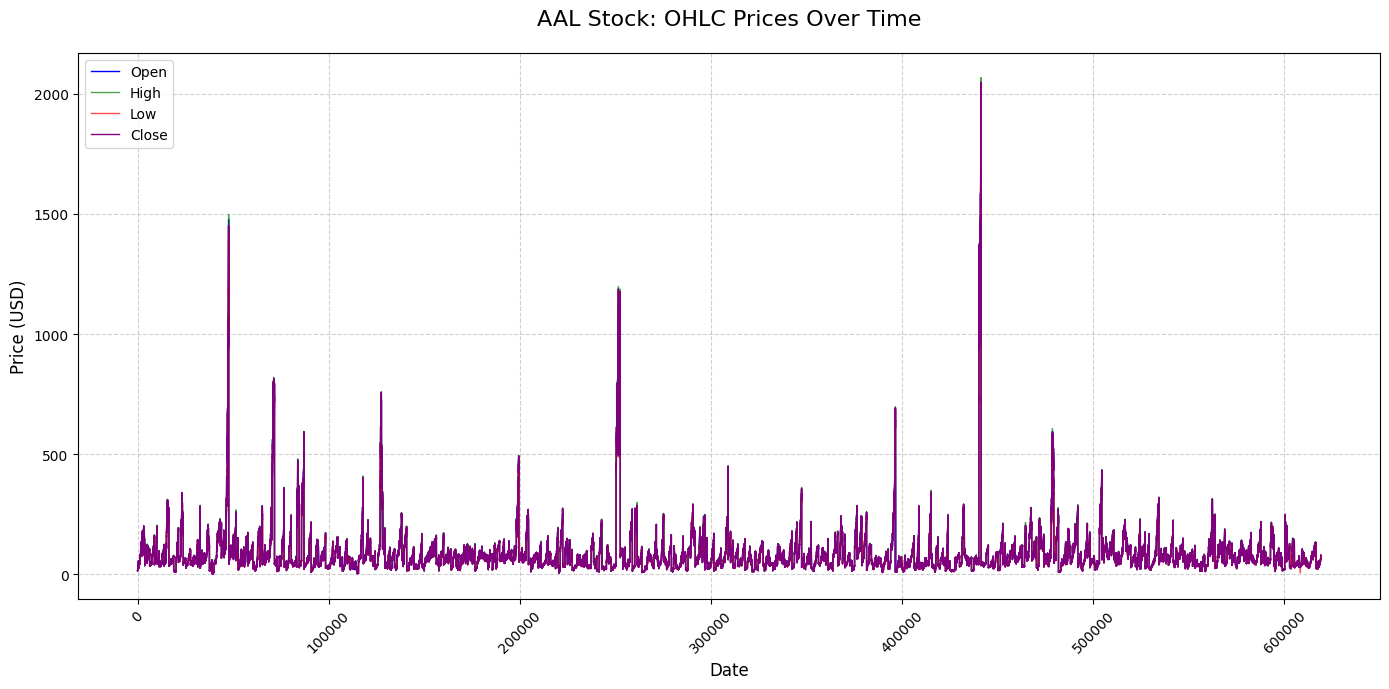

In [ ]:
plt.figure(figsize=(14, 7))

# Use a color palette for better distinction
colors = ['blue', 'green', 'red', 'purple']
sns.lineplot(data=df_cleaned, x=df_cleaned.index, y='open', label='Open', color=colors[0], linewidth=1)
sns.lineplot(data=df_cleaned, x=df_cleaned.index, y='high', label='High', color=colors[1], linewidth=1, alpha=0.7)
sns.lineplot(data=df_cleaned, x=df_cleaned.index, y='low', label='Low', color=colors[2], linewidth=1, alpha=0.7)
sns.lineplot(data=df_cleaned, x=df_cleaned.index, y='close', label='Close', color=colors[3], linewidth=1)

# Add titles and labels
plt.title('AAL Stock: OHLC Prices Over Time', fontsize=16, pad=20)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

# Customize legend and grid
plt.legend(loc='upper left', frameon=True, fontsize=10)
plt.grid(True, linestyle='--', alpha=0.6)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Tight layout to prevent label cutoff
plt.tight_layout()
plt.show()

Volume VS Daily return

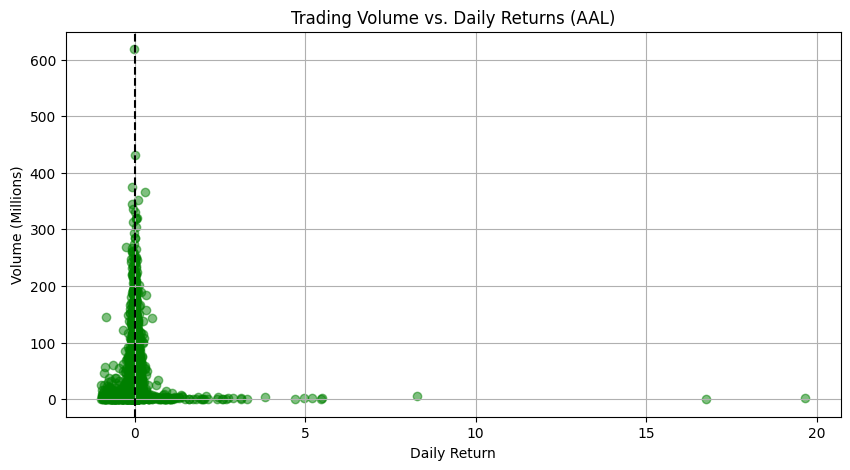

In [ ]:
plt.figure(figsize=(10, 5))
plt.scatter(df_cleaned['daily_return'], df_cleaned['volume']/1e6, alpha=0.5, color='green')
plt.axvline(0, color='black', linestyle='--')
plt.title('Trading Volume vs. Daily Returns (AAL)')
plt.xlabel('Daily Return')
plt.ylabel('Volume (Millions)')
plt.grid(True)
plt.show()

In [ ]:
df_aal['daily_return'] = df_aal['close'].pct_change()

plt.figure(figsize=(10, 6))
sns.histplot(df_aal['daily_return'].dropna(), bins=100, kde=True, color='purple')
plt.title('Distribution of AAL Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

In [ ]:
import requests
from bs4 import BeautifulSoup
import json

# Target URL
url = "https://finance.yahoo.com/most-active"

# Headers to mimic browser
headers = {
    'User-Agent': 'Mozilla/5.0'
}

# Fetch the page
response = requests.get(url, headers=headers)

# Parse the page
soup = BeautifulSoup(response.text, "html.parser")

# Locate the stock table
table = soup.find("table")
rows = table.find_all("tr")[1:]  # Skip header row

data = []

# Extract each row
for row in rows:
    cols = row.find_all("td")
    if len(cols) < 6:
        continue  # skip incomplete rows

    stock = {
        "Symbol": cols[0].text.strip(),
        "Name": cols[1].text.strip(),
        "Price": cols[2].text.strip(),
        "Change": cols[3].text.strip(),
        "% Change": cols[4].text.strip(),
        "Volume": cols[5].text.strip()
    }
    data.append(stock)

# Save to JSON file
with open("most_active_stocks.json", "w") as f:
    json.dump(data, f, indent=2)

print("Scraped data saved to most_active_stocks.json")


Scraped data saved to most_active_stocks.json
